When there are more variables involved, it becomes impossible for human mind to understand the trend in regression. So, we need a mathmatical way to represent the error in estimation. Cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y

![alt text](https://drive.google.com/uc?export=view&id=1ZuxUNExH52XLLf5TPmPJP3UDMzj4QA2Y)

A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line. Error can be found as Absolute error, Mean Absolute error, Squared Mean Error etc.

Most commonly used cost function for Linear regression is represented below:

Cost Function: $$ J(\theta_1,\theta_2) = \frac1 {2m} * \sum_{i=1}^{m} (y_i'-y_i)^2  $$

And our goal is to minmize this cost function by updating values of $\theta$$_1$ and $\theta$$_0$.

Goal: $$ minimize - J(\theta_0 , \theta_1) $$

## Gradient descent

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. To find a local minimum of a function using gradient descent, we take steps proportional to the negative of the gradient of the function at the current point.



Gradient Descent: $$ \theta_j : = \theta_j - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_j} \left( J(\theta_0, \theta_1) \right)   $$

In [1]:
# importing important libraries

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

## Define Cost Function

Cost Function: $$ J(\theta_1,\theta_2) = \frac1 {2m} * \sum_{i=1}^{m} (y_i'-y_i)^2  $$

In [2]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

## Define Gradient Descent

Gradient Descent: $$ \theta_j : = \theta_j - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_j} \left( J(\theta_0, \theta_1) \right)   $$

In [63]:
def gradientDescent(X, Y, theta, alpha, iters):
    for i in range(iters):
        cost = computeCost(X, Y, theta)
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - Y), axis=0)
        
        if i % 50 == 0: # just look at cost every ten loops for debugging
            print(cost)
            print(theta)
            print((alpha/len(X)) * np.sum((X @ theta.T - Y), axis=0))

    return (theta, cost)

## Get Data

In [53]:
# from numpy import genfromtxt
# this is your 'bad' data set from github
my_data = np.genfromtxt('lr_data.csv', delimiter=',')

In [54]:
my_data

array([[ 32.50234527,  31.70700585],
       [ 53.42680403,  68.77759598],
       [ 61.53035803,  62.5623823 ],
       [ 47.47563963,  71.54663223],
       [ 59.81320787,  87.23092513],
       [ 55.14218841,  78.21151827],
       [ 52.21179669,  79.64197305],
       [ 39.29956669,  59.17148932],
       [ 48.10504169,  75.3312423 ],
       [ 52.55001444,  71.30087989],
       [ 45.41973014,  55.16567715],
       [ 54.35163488,  82.47884676],
       [ 44.1640495 ,  62.00892325],
       [ 58.16847072,  75.39287043],
       [ 56.72720806,  81.43619216],
       [ 48.95588857,  60.72360244],
       [ 44.68719623,  82.89250373],
       [ 60.29732685,  97.37989686],
       [ 45.61864377,  48.84715332],
       [ 38.81681754,  56.87721319],
       [ 66.18981661,  83.87856466],
       [ 65.41605175, 118.5912173 ],
       [ 47.48120861,  57.25181946],
       [ 41.57564262,  51.39174408],
       [ 51.84518691,  75.38065167],
       [ 59.37082201,  74.76556403],
       [ 57.31000344,  95.45505292],
 

In [55]:
my_data.shape

(100, 2)

In [56]:
# here x is columns
X = my_data[:, 0].reshape(-1,1) # -1 tells numpy to figure out the dimension by itself
ones = np.ones([X.shape[0], 1])
X = np.concatenate([ones, X],1)
#X = np.hstack([ones, X]) # hstack Stack arrays in sequence horizontally (column wise)

# y is a columns vector
y = my_data[:, 1].reshape(-1,1)

## Initialize Hyper Parameter

In [58]:
# notice small alpha value
alpha = 0.0001
iters = 1000

# theta is a row vector
theta = np.array([[1.0, 1.0]])

## Run the Algorithm

In [68]:
g, cost = gradientDescent(X, y, theta, alpha, iters)  

319.40631589398157
[[1.00227767 1.00227767]]
[-0.00226629]
214.63042464316484
[[1.10276924 1.10276924]]
[-0.00176425]
151.35234293335236
[[1.18099946 1.18099946]]
[-0.00137343]
113.17450145450972
[[1.24189977 1.24189977]]
[-0.00106918]
90.17030690840676
[[1.28930917 1.28930917]]
[-0.00083233]
76.33235673451853
[[1.32621623 1.32621623]]
[-0.00064795]
68.02652221409966
[[1.35494747 1.35494747]]
[-0.00050441]
63.05549543045661
[[1.37731404 1.37731404]]
[-0.00039267]
60.0915952243336
[[1.39472586 1.39472586]]
[-0.00030569]
58.333282320538174
[[1.40828054 1.40828054]]
[-0.00023797]
57.29719258112077
[[1.41883253 1.41883253]]
[-0.00018525]
56.69225467500575
[[1.42704699 1.42704699]]
[-0.00014421]
56.343519536541635
[[1.43344175 1.43344175]]
[-0.00011227]
56.14609040721716
[[1.43841991 1.43841991]]
[-8.73977497e-05]
56.03727434767032
[[1.44229529 1.44229529]]
[-6.80370073e-05]
55.97976066792188
[[1.44531217 1.44531217]]
[-5.29651437e-05]
55.95146968885689
[[1.44766075 1.44766075]]
[-4.1232067

In [69]:
print(g, cost)

[[1.45286767 1.45286767]] 55.94020381897459


In [70]:
g     # g[0][0] - intercept and g[0][1] - slope

array([[1.45286767, 1.45286767]])

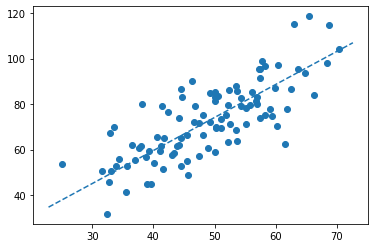

In [67]:
plt.scatter(my_data[:, 0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation
plt.plot(x_vals, y_vals, '--')